# Prosper Loan Data Exploration

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. This [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit?usp=sharing) explains the variables in the data set.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Let's load the dataset and do some initial wrangling:

In [2]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv('prosperLoanData.csv')

In [3]:
# Explore the dataframe size
loan_df.shape

(113937, 81)

In [4]:
# Check data types of the dataset fields
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
# Explore the first few rows
loan_df.head(1)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258


In [6]:
# check for duplicates in the dataset
sum(loan_df.duplicated())

0

In [7]:
#Check for number and percentage of Nulls

# Getting the number of missing values in each column
num_missing = loan_df.isna().sum()

# Excluding columns that contains 0 missing values
num_missing = num_missing[num_missing > 0]

# Getting the percentages of missing values and round down the result 
percent_missing = num_missing * 100 / loan_df.shape[0]
percent_missing = percent_missing.round(2) 

# Concatenating the number and perecentage of missing values 
# into one dataframe and sorting it 
pd.concat([num_missing, percent_missing], axis=1, 
          keys=['Missing Values', 'Percentage']).\
          sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage
GroupKey,100596,88.29
LoanFirstDefaultedCycleNumber,96985,85.12
ScorexChangeAtTimeOfListing,95009,83.39
ProsperPrincipalOutstanding,91852,80.62
ProsperPrincipalBorrowed,91852,80.62
ProsperPaymentsOneMonthPlusLate,91852,80.62
ProsperPaymentsLessThanOneMonthLate,91852,80.62
OnTimeProsperPayments,91852,80.62
TotalProsperPaymentsBilled,91852,80.62
TotalProsperLoans,91852,80.62


It seems that there are a lot of nulls for most of the variables in the dataset since I'm only interested to investigate some of the features from this dataset, I will subset the dataframe to extract the features of interest for my analysis and remove the nulls for this subset dataframe only:

Since Prosper use their own proprietary Prosper Rating only since 2009, we have a lot of missing values in `ProsperRating (Alpha)` column, Let's drop these missing values:

In [8]:
income_std = loan_df['StatedMonthlyIncome'].std()
income_mean = loan_df['StatedMonthlyIncome'].mean()
boundary = income_mean + income_std * 3
boundary

28043.51739380842

In [9]:
# leaving only completed chargedoff or defaulted listings
condition = (loan_df['LoanStatus'] == 'Completed') | (loan_df['LoanStatus'] == 'Defaulted') | (loan_df['LoanStatus'] == 'Chargedoff')
loan_df = loan_df[condition]

loan_df


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.00,0.00,0.00,1.0,0,0,0.0,258
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.00,0.00,0.00,1.0,0,0,0.0,41
11,0F1734025150298088A5F2B,213551,2007-10-09 20:28:33.640000000,C,36,Completed,2008-01-07 00:00:00,0.15033,0.1325,0.1225,...,-0.88,0.0,0.00,0.00,0.00,1.0,0,0,0.0,53
15,0F483544120452347F48121,577164,2012-04-10 09:14:46.297000000,NaN,36,Defaulted,2012-12-19 00:00:00,0.35797,0.3177,0.3077,...,-9.81,0.0,3790.25,3790.25,0.00,1.0,0,0,0.0,10
17,0FDF336575182398852A8DC,31540,2006-08-15 12:21:09.433000000,AA,36,Chargedoff,2008-05-22 00:00:00,0.13202,0.1250,0.1175,...,-54.61,0.0,6012.65,6012.67,268.96,1.0,0,0,0.0,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113926,E34333654295683286C35C2,28121,2006-08-01 10:31:31.143000000,E,36,Defaulted,2007-09-06 00:00:00,0.29776,0.2900,0.2850,...,-9.34,0.0,2536.11,2536.10,0.00,1.0,0,0,0.0,39
113927,E3433419834735803891976,322787,2008-04-30 21:25:19.670000000,AA,36,Completed,2011-05-09 00:00:00,0.07469,0.0679,0.0579,...,-68.47,0.0,0.00,0.00,0.00,1.0,2,0,0.0,194
113928,E34935176664905343E01EA,510097,2011-06-06 19:02:44.443000000,NaN,36,Completed,2011-09-19 00:00:00,0.22362,0.1899,0.1799,...,-4.41,0.0,0.00,0.00,0.00,1.0,0,0,0.0,25
113929,E3553583161337791FCB87F,830413,2013-07-06 17:40:01.657000000,NaN,36,Completed,2014-02-07 00:00:00,0.30285,0.2639,0.2539,...,-6.54,0.0,0.00,0.00,0.00,1.0,0,0,0.0,26


### What is the structure of your dataset?

This data set contains 113,937 loans with 81 variables on each loan, for the purpose of this investigation I've taken the following variables: <b>Term, LoanStatus, BorrowerRate, ProsperRating (Alpha), ListingCategory (numeric), EmploymentStatus, DelinquenciesLast7Years, StatedMonthlyIncome, TotalProsperLoans, LoanOriginalAmount, LoanOriginationDate, Recommendations, Investors</b>. After adjusting and wrangling dataset contained 26005 data points.

### What is/are the main feature(s) of interest in your dataset?

<ul>
    <li>The factors which can be used to predict default on credit.</li>
    <li>What factors influence Prosper rating.</li>
</ul>

## Univariate Exploration

For `Term`: the loans time periods, there are three options: 36, 60 and 12 months. the most common trem for the loans in the dataset is 36 months. Next, let's check `LoanStatus`:

Text(0.5, 1.0, 'Loan status Counts')

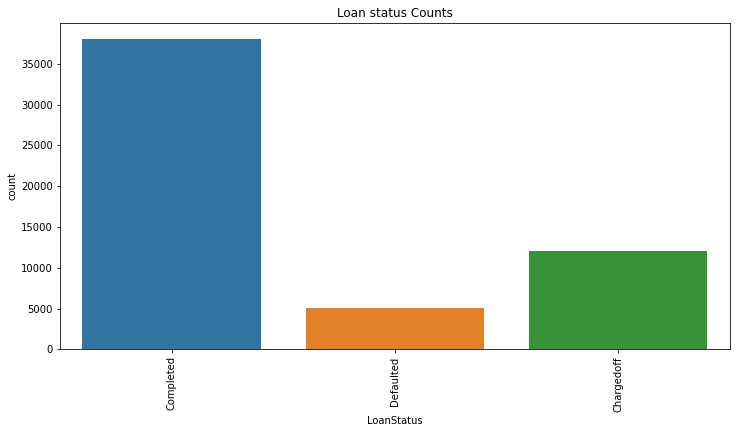

In [10]:
plt.figure(figsize=[12, 6])
plt.xticks(rotation=90)
sb.countplot(data = loan_df, x = 'LoanStatus');
plt.title('Loan status Counts')

Most of the loans in the dataset are actually **Current** loans. Following it with a big frequency the **Completed** loans, followed by  **Chargedoff**, while **Defaulted** and **Past due** categories loans represent a minority. 
Up next - `BorrowerRate`:

Text(0.5, 1.0, 'Borrow Rate counts')

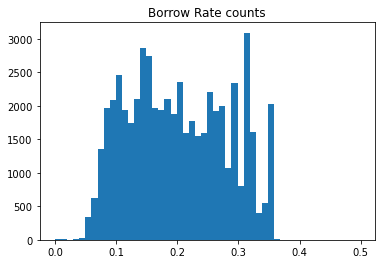

In [11]:
plt.hist(data=loan_df, x='BorrowerRate', bins=50);
plt.title('Borrow Rate counts')

The distribution of the `BorrowerRate` appears to be bimodal with first peak around 0.16, larger peak (true mode) around 0.32. Let's check number of occurrences:

In [12]:
# Check the frequency of the top 2 peaks
loan_df.BorrowerRate.value_counts().nlargest(2)

0.3500    1905
0.3177    1764
Name: BorrowerRate, dtype: int64

In [15]:
# order of ratings
ratings_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
# created ordered categorical variable
loan_df['ProsperRating (Alpha)'] = pd.Categorical(loan_df['ProsperRating (Alpha)'],
                                                   categories = ratings_order,
                                                   ordered = True)

Turns out two most common rates are 0.3177 and 0.3199. Let's check `ProsperRating (Alpha)` next:

Text(0.5, 1.0, 'Prosper Rating distribution  (Alpha)')

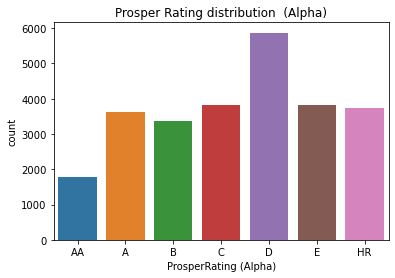

In [17]:
sb.countplot(data=loan_df, x='ProsperRating (Alpha)');
plt.title('Prosper Rating distribution  (Alpha)')

Interestingly enough ratings are almost normally distributed with the highest D rating and the lowest rating AA are the least common 

Text(0.5, 1.0, 'Listing Category distribution  (Alpha)')

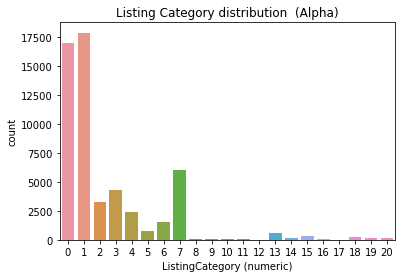

In [18]:
sb.countplot(data=loan_df, x='ListingCategory (numeric)');
plt.title('Listing Category distribution  (Alpha)')

The vast majority of loans are used for debt consolidation. Other notable categories include Other, Auto, Home Improvement and Business. Next variable - `EmploymentStatus`:

Text(0.5, 1.0, 'Employee Status Distribution ')

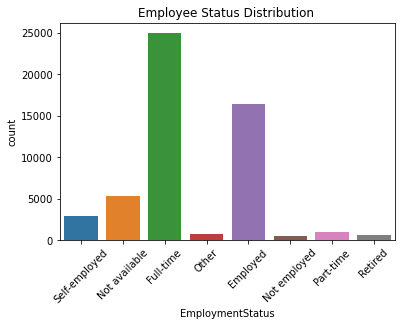

In [19]:
sb.countplot(data=loan_df, x='EmploymentStatus')
plt.xticks(rotation=45);
plt.title('Employee Status Distribution ')

The majority of borrowers are **Full Time** all other categories constitute only small numbers of the borrowers. 

In [20]:
# If a data point is far from the mean by more than 3 standard deviations it will be considered an outlier
income_std = loan_df['StatedMonthlyIncome'].std()
income_mean = loan_df['StatedMonthlyIncome'].mean()
boundary = income_mean + income_std * 3
len(loan_df[loan_df['StatedMonthlyIncome'] >= boundary])

343

Let's take a close look at the `StatedMonthlyIncome`:

Text(0.5, 1.0, 'MOnthly income distribution')

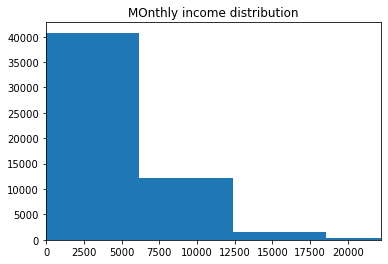

In [21]:
# This time limit x scale by boundary
plt.hist(data=loan_df, x='StatedMonthlyIncome', bins=100);
plt.xlim(0, boundary);
plt.title('MOnthly income distribution')

For the most clients this is their first loan at prosper, small minority of clients already borrowed 1, 2 or 3 loans, the maximum is 8 loans. Next step - `LoanOriginalAmount`:

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Prosper ratings are almost normally distributed. Distribution of monthly stated income is very awkward: with a lot of outliers and a very large range of values, because this is evidently based on borrowers' self-reporting, I think there is a lot of wrong values, we will wrangle with it bellow. I did not feel like any scale transformations can be useful here. Most loans are below 15,000, it seems like most loans are increments of 5,000.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The majority of loans are actually current loans. Since our main goal is to define driving factors of outcome of loan we are not interested in any current loans (and loans with a specified past due period) also chargedoff loans can be considered as defaulted. We will make some adjustments to the data in the next step:

## Bivariate Exploration

Let's start with the pair-wise correlation between all numeric variables:

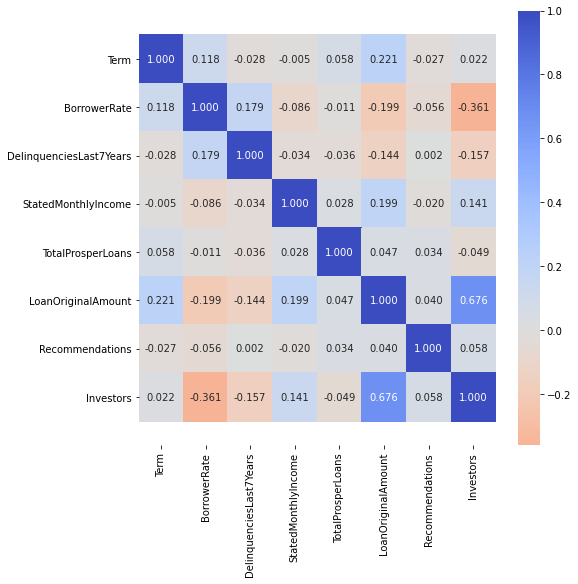

In [22]:
# extract the numerical varibles
numeric_vars = ['Term', 'BorrowerRate', 'DelinquenciesLast7Years', 'StatedMonthlyIncome',
                'TotalProsperLoans', 'LoanOriginalAmount', 'Recommendations', 'Investors'
               ]
# settings of the heatmap
plt.figure(figsize = [8, 8])
ax = sb.heatmap(loan_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'coolwarm_r', center = 0)

# adjust the cutted edges of the heatmap
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5);

- Interestingly there is no strong correlation between variables in this dataset. 


- There is some moderate positive correlation between `LoanOriginalAmount` and `Term`, `LoanOriginalAmount` and number of 
`Investors`, `LoanOriginalAmount` and `StatedMonthlyIncome`, `Recommendations` and `TotalProsperLoans`, number of delinquencies and borrowers rate. 


- There is also moderate negative correlation between loan amount and borrower rate and number of investors and borrower rate. 


Let's move to the categorical features:

Text(0.5, 1.0, 'Loan Staus Distribution')

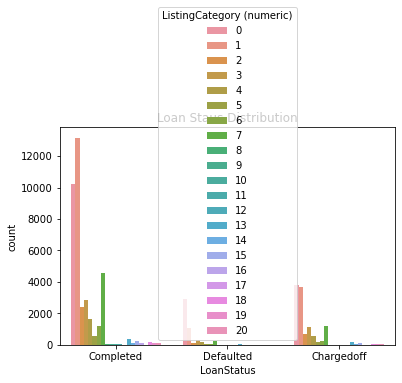

In [23]:
sb.countplot(data=loan_df, x='LoanStatus', hue='ListingCategory (numeric)');
plt.title('Loan Staus Distribution')

Visually we can see that proportion of complted loans is higer for  0 and 1 category than for other or debt consolidation category. Next loan status and Prosper rating:

Text(0.5, 1.0, 'Loan Status distribution ')

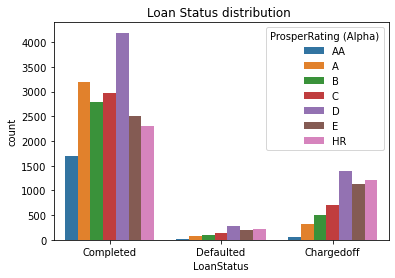

In [24]:
sb.countplot(data=loan_df, x='LoanStatus', hue='ProsperRating (Alpha)');
plt.title('Loan Status distribution ')

That is actually quite interesting: The most frequent rating among defaulted loans is actually <b>D</b>, this is contrary to the common logic - most common rating for defaulted debts should be <b>HR</b>. Let's see how loan status and investors are connected:

Text(0.5, 1.0, 'Employee staus vs loan status')

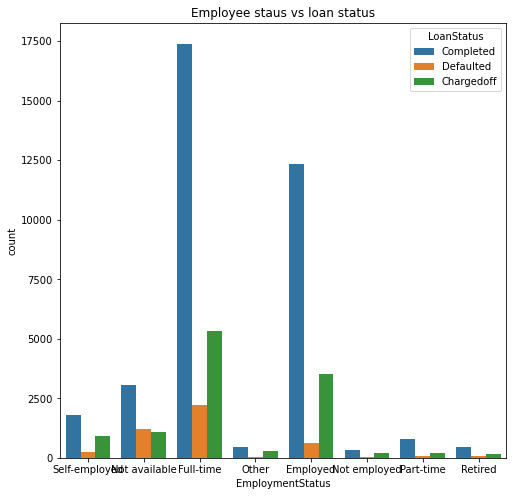

In [25]:
plt.figure(figsize = [8, 8])
sb.countplot(data=loan_df, x='EmploymentStatus', hue='LoanStatus');
plt.title('Employee staus vs loan status')

Visually it seems that burrowers with employment status 'Not Employed' and 'Self-employed are more likely to default on credit. Next let's have a closer look at loan status and loan amount.

Text(0.5, 1.0, 'Prosper Rating (Alpha) vs Employee status')

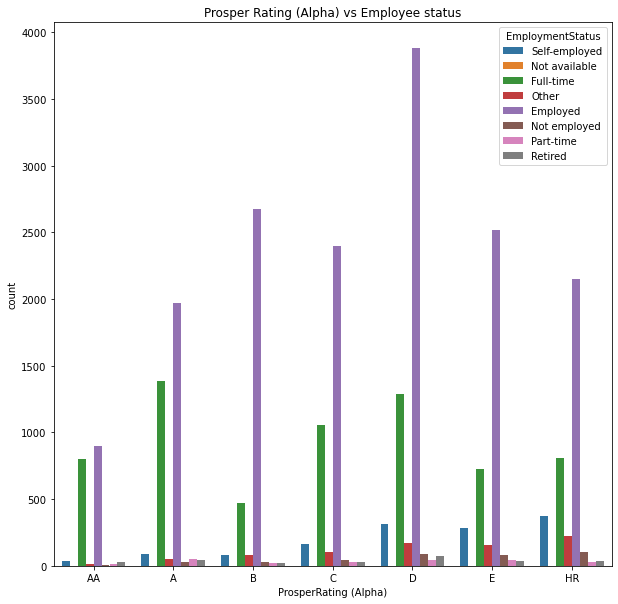

In [26]:
plt.figure(figsize = [10, 10])
sb.countplot(data = loan_df, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus');
plt.title('Prosper Rating (Alpha) vs Employee status')

Lower ratings seem to have greater proportions of individuals with employment status . Next let’s check number of delinquencies and rating.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

As expected default credits tend to be given to individuals with lower rating. Business and home improvement seems to be riskier categories. The borrower rate tends to be higher for defaulted credits. Long term (60 months) credits are riskier than short term (12 months). Borrower rate for individuals with low rating is higher. High monthly income corresponds to higher rating. Employment status of individuals with lower ratings tends to be 'Not employed', 'Self-employed', 'Retired' or 'Part-time'. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

One interesting thing I've observed is that prosper rating D is the most frequent rating among defaulted credits.

## Multivariate Exploration

Let's have a closer look on relationship between Term, Rate, Delinquencies, Monthly Income, Loan Amount and Loan Status.

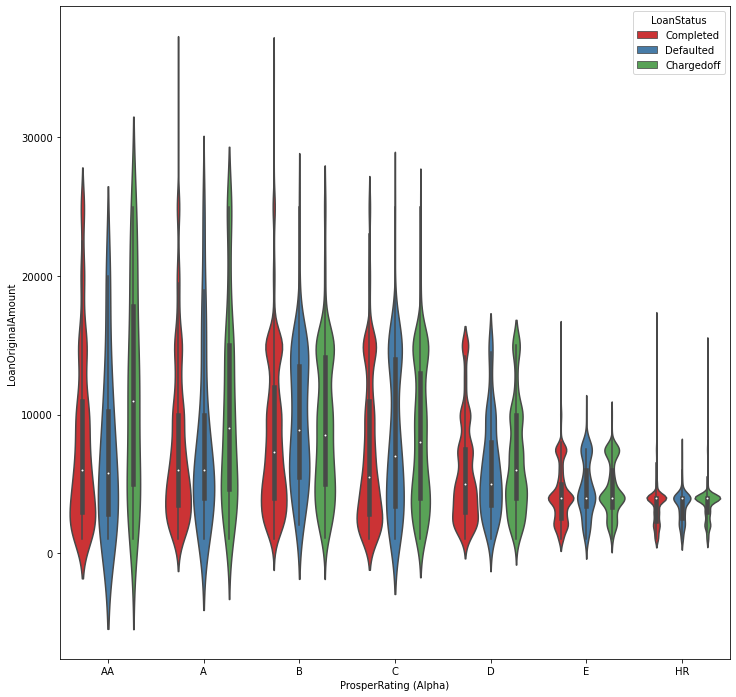

In [27]:
plt.figure(figsize = [12, 12])
sb.violinplot(data=loan_df, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus', palette="Set1");

Except for the lowest ratings defaulted credits tend to be larger than completed. At first glance this is at odds with what we've figured in previous section (defaulted credits tend to be smaller than completed), but most of the defaulted credits comes from individuals with low Prosper rating (they tend to borrow less) and this drives average amount of defaulted credit down. 

Let's check how amount, listing category loan and loan status interact:

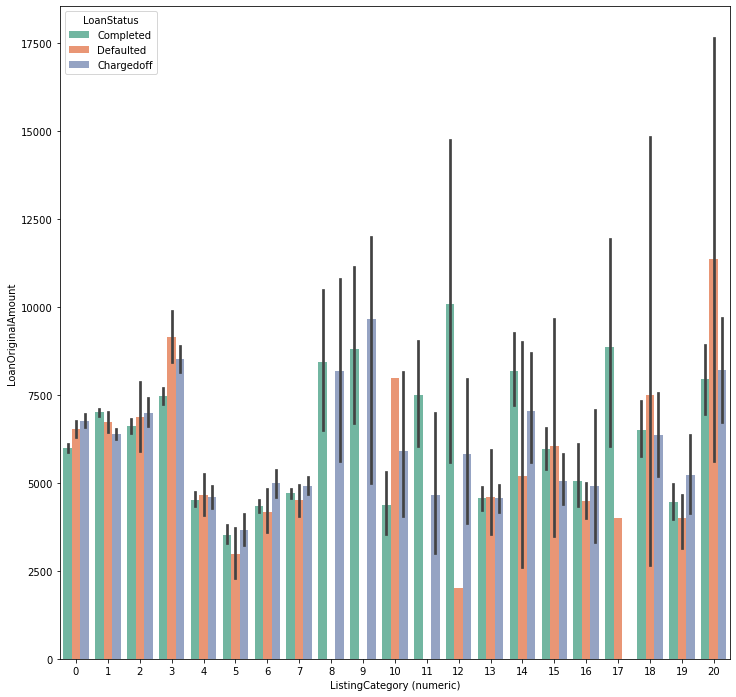

In [28]:
plt.figure(figsize = [12, 12])
sb.barplot(data=loan_df, x='ListingCategory (numeric)', y='LoanOriginalAmount', hue='LoanStatus', palette="Set2");

As we've found before Auto and Business categories are somewhat more prone to the defaulting and now we can see that business category tend to have larger amount. Let's have closer look at relationships between credit category, credit rating and outcome of credit.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Our initial assumptions were strengthened. The outcome of credit depends on Prosper raing, Term, Employment status. Defaulted credits tend to be larger than completed for all ratings except the lowest ones. In terms of purposes of credits more default prone are other and business categories (business category also tend to have larger loans). Long term (60 months) loans are riskier than mid-term and short term.

### Were there any interesting or surprising interactions between features?

Interesting find was that defaulted credits for individuals with high Prosper ratings tend to be larger than completed credits. Another interesting find that individuals with lowerst rating (HR) have only mid-term (36 months) credits.